In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import geopandas as gpd
sns.set_theme()

## Upload the datasets

Quick Dataset Overview

In [54]:
demo=pd.read_csv("C:\\Users\DannyC19\Desktop\Python\EDA project\Germany\demographics_de.csv")
print(demo.shape)
demo.head()

(192, 4)


,state,gender,age_group,population
0,Baden-Wuerttemberg,female,00-04,261674
1,Baden-Wuerttemberg,female,05-14,490822
2,Baden-Wuerttemberg,female,15-34,1293488
3,Baden-Wuerttemberg,female,35-59,1919649
4,Baden-Wuerttemberg,female,60-79,1182736


In [6]:
demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   state       192 non-null    object
 1   gender      192 non-null    object
 2   age_group   192 non-null    object
 3   population  192 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 6.1+ KB


In [36]:
demo.nunique()

state          16
gender          2
age_group       6
population    192
dtype: int64

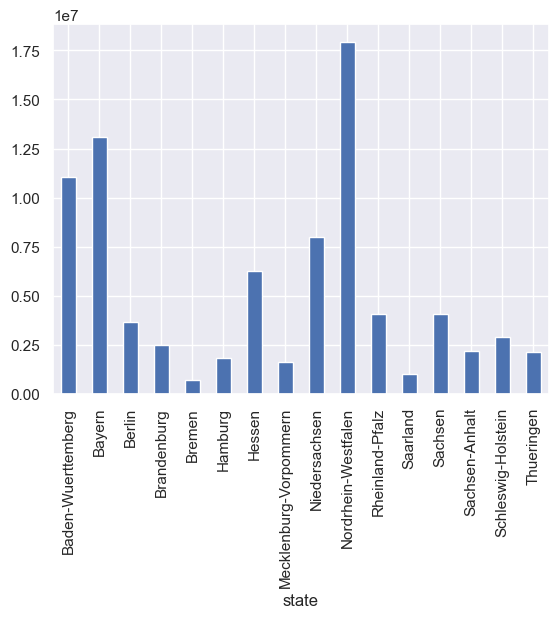

In [57]:
#population by state
demo.groupby('state')['population'].sum().plot.bar()
plt.show()

In [25]:
covid=pd.read_csv("C:\\Users\DannyC19\Desktop\Python\EDA project\Germany\covid_de.csv",index_col="date")
print(covid.shape)
covid.sample(7)

(2790555, 7)


,state,county,age_group,gender,cases,deaths,recovered
date,,,,,,,
2022-09-11,Baden-Wuerttemberg,LK Heidenheim,80-99,F,2,1,1
2021-03-01,Nordrhein-Westfalen,SK Solingen,60-79,F,1,0,1
2022-07-06,Bayern,SK Bamberg,60-79,M,8,0,8
2020-11-21,Rheinland-Pfalz,LK Bernkastel-Wittlich,15-34,F,3,0,3
2021-08-12,Saarland,LK Stadtverband Saarbruecken,05-14,M,2,0,2
2022-09-28,Baden-Wuerttemberg,LK Zollernalbkreis,80-99,F,6,1,5
2021-04-23,Baden-Wuerttemberg,LK Bodenseekreis,35-59,F,11,0,11


In [14]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2790555 entries, 2020-03-27 to 2022-08-24
Data columns (total 7 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   state      object
 1   county     object
 2   age_group  object
 3   gender     object
 4   cases      int64 
 5   deaths     int64 
 6   recovered  int64 
dtypes: int64(3), object(4)
memory usage: 170.3+ MB


In [35]:
covid.nunique()

state         16
county       411
age_group      6
gender         2
cases        951
deaths        21
recovered    955
dtype: int64

In [16]:
covid.describe()

,cases,deaths,recovered
count,2.790555e+06,2.790555e+06,2.790555e+06
mean,1.333496e+01,5.761148e-02,1.305119e+01
std,3.009627e+01,3.214108e-01,3.006811e+01
min,1.000000e+00,0.000000e+00,-1.000000e+00
25%,2.000000e+00,0.000000e+00,1.000000e+00
50%,4.000000e+00,0.000000e+00,4.000000e+00
75%,1.200000e+01,0.000000e+00,1.200000e+01
max,2.156000e+03,2.100000e+01,2.156000e+03


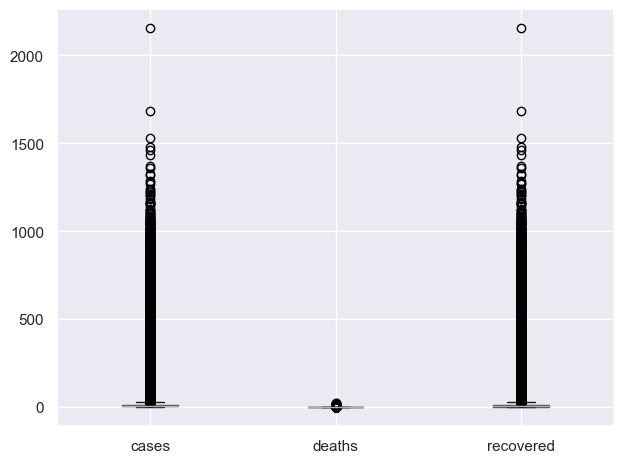

In [48]:
#Using boxplots to identify outliers within numeric data
fig, ax = plt.subplots(nrows=1, ncols=1)
ax = covid.boxplot()
fig.tight_layout()

In [44]:
vaccines=pd.read_csv("C:\\Users\DannyC19\Desktop\Python\EDA project\Germany\covid_de_vaccines.csv",index_col="date")
print(vaccines.shape)
vaccines.sample(7)

(757, 8)


,doses,doses_first,doses_second,pfizer_cumul,moderna_cumul,astrazeneca_cumul,persons_first_cumul,persons_full_cumul
date,,,,,,,,
2022-07-01,35743,1329,1937,135080060,31273160,12802221,64743043,63397449
2021-11-23,858007,125818,75337,95227734,10077397,12778625,59841465,56543314
2021-03-06,203148,154359,48789,6480187,269316,991415,5194970,2546049
2022-02-24,210667,11400,38252,127547883,29857767,12794318,64374703,62612826
2021-03-19,246409,161635,84774,8368780,439978,1965709,7432123,3342449
2022-04-18,2801,173,361,132182176,30835295,12798054,64634976,63195026
2022-05-10,82691,2371,4381,133479162,31048653,12801079,64685159,63292098


In [27]:
vaccines.info()

<class 'pandas.core.frame.DataFrame'>
Index: 757 entries, 2020-12-27 to 2023-01-22
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   doses                757 non-null    int64
 1   doses_first          757 non-null    int64
 2   doses_second         757 non-null    int64
 3   pfizer_cumul         757 non-null    int64
 4   moderna_cumul        757 non-null    int64
 5   astrazeneca_cumul    757 non-null    int64
 6   persons_first_cumul  757 non-null    int64
 7   persons_full_cumul   757 non-null    int64
dtypes: int64(8)
memory usage: 53.2+ KB


In [34]:
vaccines.nunique()

doses                  755
doses_first            729
doses_second           719
pfizer_cumul           757
moderna_cumul          752
astrazeneca_cumul      573
persons_first_cumul    757
persons_full_cumul     739
dtype: int64

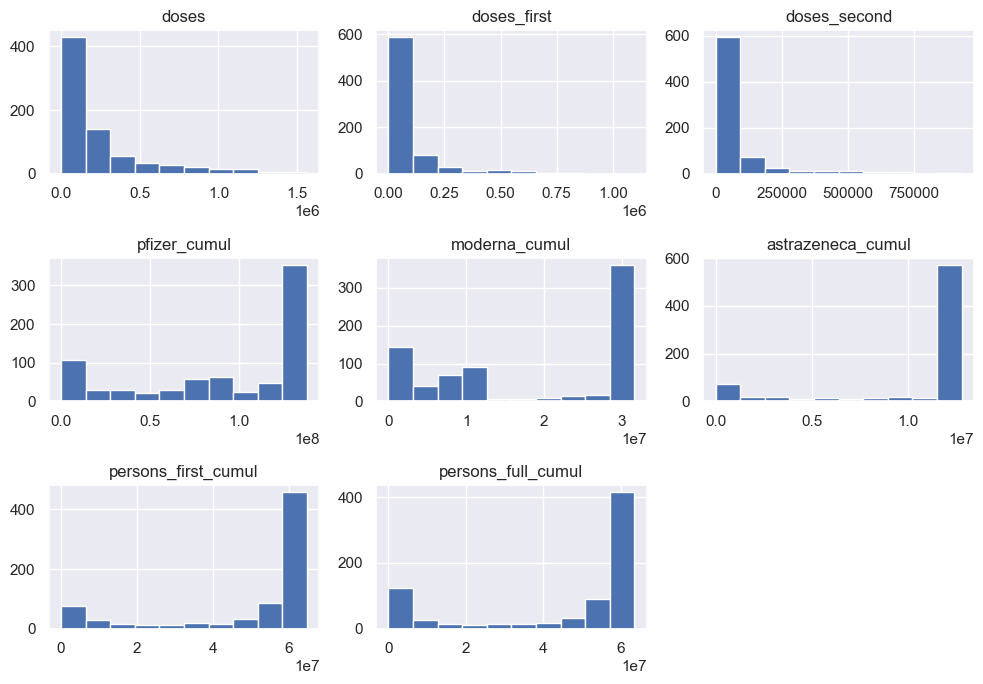

In [33]:
vaccines.hist(figsize=(10,7))
plt.tight_layout()
plt.show()

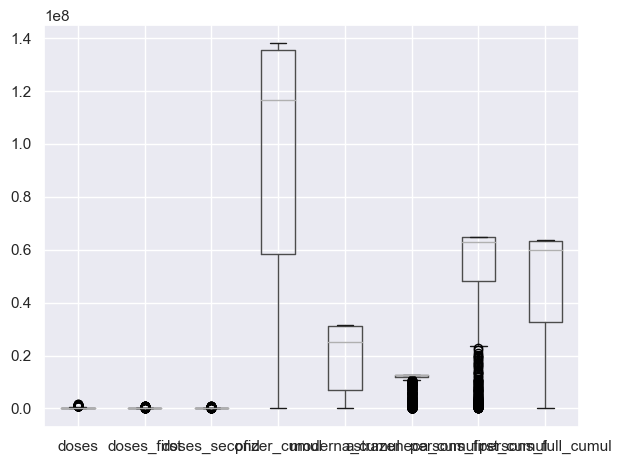

In [46]:
#Using boxplots to identify outliers within numeric data
fig, ax = plt.subplots(nrows=1, ncols=1)
ax = vaccines.boxplot()
fig.tight_layout()
# astrazeneca_cumul & persons_first_cumul have outliers


In [47]:
vaccines.describe()

,doses,doses_first,doses_second,pfizer_cumul,moderna_cumul,astrazeneca_cumul,persons_first_cumul,persons_full_cumul
count,7.570000e+02,7.570000e+02,757.000000,7.570000e+02,7.570000e+02,7.570000e+02,7.570000e+02,7.570000e+02
mean,2.519139e+05,8.568953e+04,80924.307794,9.308602e+07,1.872965e+07,1.061374e+07,5.081643e+07,4.642459e+07
std,3.210373e+05,1.540879e+05,146063.374107,4.893454e+07,1.293434e+07,4.251074e+06,2.146828e+07,2.356684e+07
min,2.600000e+02,2.000000e+00,0.000000,2.441800e+04,8.000000e+00,1.000000e+00,2.442700e+04,0.000000e+00
25%,3.883700e+04,9.090000e+02,1130.000000,5.825586e+07,6.869072e+06,1.195021e+07,4.822028e+07,3.265027e+07
50%,1.119680e+05,1.998400e+04,20925.000000,1.167168e+08,2.509806e+07,1.278718e+07,6.310455e+07,5.977700e+07
75%,3.115900e+05,9.668800e+04,83917.000000,1.355385e+08,3.134615e+07,1.280229e+07,6.475736e+07,6.342007e+07
max,1.562040e+06,1.096099e+06,930770.000000,1.380166e+08,3.157801e+07,1.280302e+07,6.486697e+07,6.355381e+07


### #Identify Missing Data

In [40]:
print(demo.isnull().sum())
print(covid.isnull().sum())
print(vaccines.isnull().sum())

state         0
gender        0
age_group     0
population    0
dtype: int64
state             0
county            0
age_group     14023
gender       125291
cases             0
deaths            0
recovered         0
dtype: int64
doses                  0
doses_first            0
doses_second           0
pfizer_cumul           0
moderna_cumul          0
astrazeneca_cumul      0
persons_first_cumul    0
persons_full_cumul     0
dtype: int64


In [43]:
#rows that miss both age_group and gender
covid[covid.age_group.isnull() &covid.gender.isnull()]

,state,county,age_group,gender,cases,deaths,recovered
date,,,,,,,
2022-02-18,Baden-Wuerttemberg,LK Alb-Donau-Kreis,NaN,NaN,1,0,1
2022-01-19,Baden-Wuerttemberg,LK Boeblingen,NaN,NaN,1,0,1
2022-01-20,Baden-Wuerttemberg,LK Boeblingen,NaN,NaN,1,0,1
2022-01-25,Baden-Wuerttemberg,LK Boeblingen,NaN,NaN,1,0,1
2022-01-31,Baden-Wuerttemberg,LK Boeblingen,NaN,NaN,1,0,1
...,...,...,...,...,...,...,...
2021-03-24,Thueringen,LK Sonneberg,NaN,NaN,2,0,2
2021-11-24,Thueringen,LK Unstrut-Hainich-Kreis,NaN,NaN,1,0,1
2022-12-20,Thueringen,SK Jena,NaN,NaN,1,0,0
